# Data Analysis Assignment 1
## Annika Stechemesser - 1664383


## Question 3.1 Spotting fake data

#### The first digits of many real-world data sets do not follow a uniform distribution. This observation is called Benford's law, where $P(d)=log_10(1+1/d)$ where $d=1,2,...,9$. When data is faked a uniform random number generator is often used. We download the dataset as a csv file from the Nasdaq archive. The third column indicated the stock price.

In [113]:
using Distributions;
using PyPlot;


#### Before we can start answersing the actual questions, we have to prepare the dataset. We import it and extract the third column. In the next step we use a filter function to filter "n\a" values and strings out of the stock price column. We're then converting the prices from an "any" type to floats. For our purposes, we're only interested in the first digit of the price.  We make sure we also get the first digit of the entries smaller than zero and then floor all our numbers and convert them in integers. Now we can use the function "digits" which takes a float and creats an vector containing the digits of the float as entries.  We pick the first one and store them in the vector $dig$.

In [2]:
M=readcsv("companylist.csv");

In [3]:
stockprice_unfiltered=M[:,3];

In [4]:
stockprice_unfiltered=filter!(e->e !="LastSale",stockprice_unfiltered)
stockprice=filter!(e->e !="n/a",stockprice_unfiltered)
convert(Array{Float64,1},stockprice);

In [33]:
for i=1:length(stockprice)
   if stockprice[i]<1
        println(stockprice[i])
        while (stockprice[i]<1)
            stockprice[i]=stockprice[i]*10
        end
        end 
end
#println(stockprice)

stockprice=floor.(stockprice)
for i=1:length(stockprice)
    a=stockprice[i]
    stockprice[i]=Int(a)
end
dig=zeros(length(stockprice))
for i=1:length(stockprice)
    A=digits(stockprice[i])
    dig[i]=A[size(A)[1],1]
end
;



### Answer for Q3.1 Part A
#### We now randomly choose 90 digits and plot their distribution. We observe that the distribution doesn't resemble a uniform distribution.

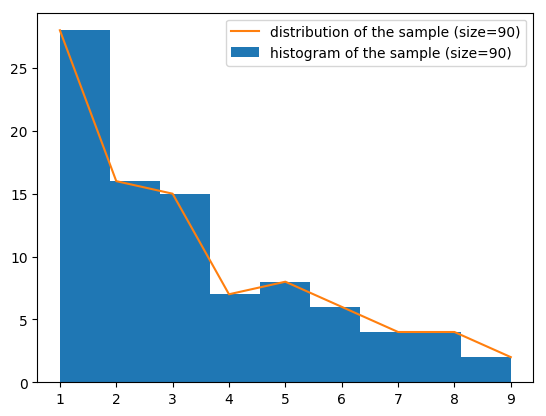

PyObject <matplotlib.legend.Legend object at 0x7f8e1c90c990>

In [115]:
n=90
num=rand(1:length(dig),n)
sample=zeros(n)
for i=1:n
    sample[i]=dig[num[i]]
end

H=plt[:hist](sample,9,label="histogram of the sample (size=90)");
x=1:1:9
plot(x,H[1],label="distribution of the sample (size=90)")
legend(loc=1)

#### We now implement a function that does the Chi Square test. 

In [58]:
#ChiSquared Test Uniform
function Chi_Square_Test(n,quant,exp_dis)
u=n
v=quant
s=0
for i=1:9
    a=v[i]-exp_dis[i]
    c=a^2/exp_dis[i]
    s=s+c
end
    return(s)
end

Chi_Square_Test (generic function with 1 method)

### Answer for Q3.1 Part B

#### In the next step we check whether our distribution is significantly different from the uniform distribution by using the Chi Squared test. 

In [116]:
exp_uni=ones(9).*10

s=Chi_Square_Test(90,H[1],exp_uni)

55.0

In [117]:
#p-value uniform:

1-cdf(Chisq(8),s)

4.414927201601415e-9

#### We get a very small p-value, so the hypothesis "The distribution is similar to the uniform distribution" would be rejected at any common significance level. We plot our results below. 

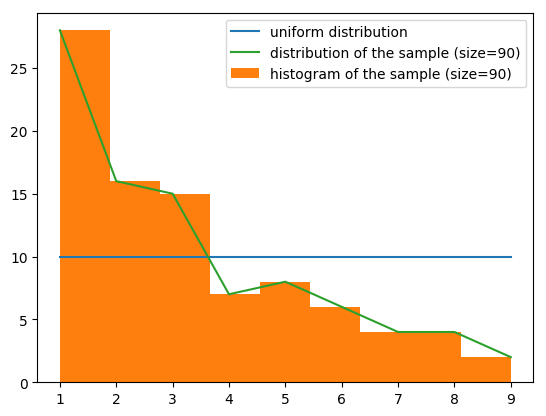

In [118]:
x=1:1:9
plot(x,exp_uni,label="uniform distribution")
H=plt[:hist](sample,9,label="histogram of the sample (size=90)")
quant=H[1]
plot(x,quant,label="distribution of the sample (size=90)")
legend(loc=1);

#### We implement the distribution suggested by Benfords Law.

In [119]:
#Benfords law

ben=zeros(9)
for i=1:9
    ben[i]=log10(1+1/i)
    
end
println(ben)


[0.30103,0.176091,0.124939,0.09691,0.0791812,0.0669468,0.0579919,0.0511525,0.0457575]


#### Now we use the Chi Squared test to check whether the distribution is different from Benfords Law.

In [120]:

exp_ben=ben.*90

s=Chi_Square_Test(90,H[1],exp_ben)


3.1867789154442483

In [121]:
#p-value benford:

1-cdf(Chisq(8),s)

0.9220949930021562

#### For a sample of size 90, the p-value is quite high. The hypothesis "The distribution resembles Benfords Law" would be accepted on most common significance levels. 

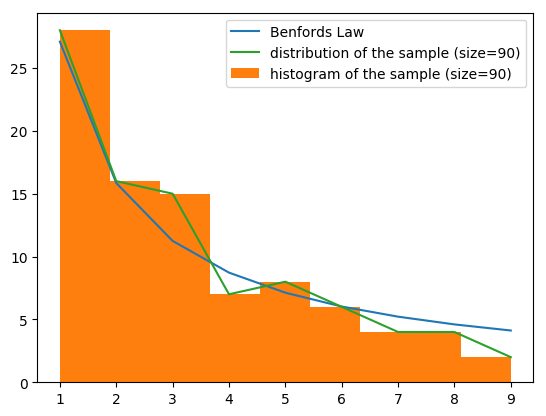

In [122]:
x=1:1:9
plot(x,exp_ben,label="Benfords Law")
H=plt[:hist](sample,9,label="histogram of the sample (size=90)")
quant=H[1]
plot(x,quant,label="distribution of the sample (size=90)")
legend(loc=1);

## Answer for Q3.1 Part C

#### We now increase our sample size to 900, plot the distribution and repeat the Chi Square test to again check the resemblance to Benfords Law.

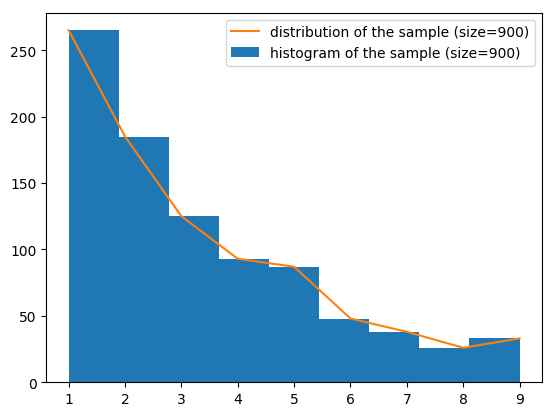

In [123]:
n=900
num=rand(1:length(dig),n)
sample=zeros(n)
for i=1:n
    sample[i]=dig[num[i]]
end

H=plt[:hist](sample,9,label="histogram of the sample (size=900)");
x=1:1:9
plot(x,H[1],label="distribution of the sample (size=900)")
legend(loc=1);

In [124]:
exp_ben=ben.*900

s=Chi_Square_Test(90,H[1],exp_ben)

26.524295062596618

In [125]:
#p-value benford:

1-cdf(Chisq(8),s)

0.0008538458177382857

#### For a larger sample size, the Chi Squared test returns a very small p-value. This is observed because the Chi Squared test is very strict for bigger sample sizes, meaning that the approximation has to be very exact to give a good result in this test. Many factors influence the distribution of the first digit of the price, so it is not perfectly natural. As we can see in the plot below, Benfords Law is still a resonable approximation for the distribution of the sample.

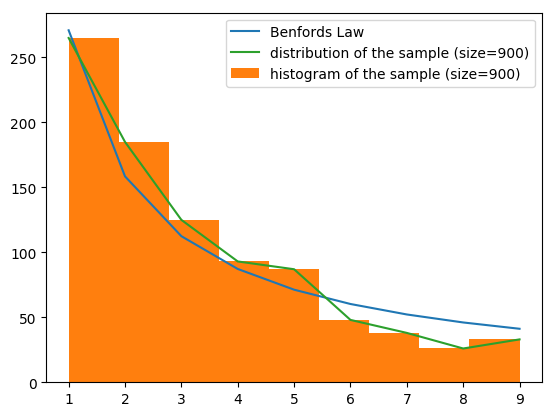

In [126]:
x=1:1:9
plot(x,exp_ben,label="Benfords Law")
H=plt[:hist](sample,9,label="histogram of the sample (size=900)")
quant=H[1]
plot(x,quant,label="distribution of the sample (size=900)")
legend(loc=1);

## Question 3.2 One-sided and two-sided test differences

#### A nationwide school test has mean mark $\mu=75$ with standard deviation $\sigma=7$. A particular school with 30 children has mean mark $\bar{X}=72$. We want to test the data for the question: Is the school underperforming? We compute the p-value and compare it to 5% and 1% significances. Our hypothesis is "The school is not underperforming".

In [127]:

n=30 #number of children
m=75 #population mean
sample_mean=72  #sample mean
std=7 #standard deviation
std_error=std/sqrt(n) 

z=(sample_mean-m)/std_error #z-statistics
p_value=cdf(Normal(),z)


0.009452920389165925

#### The p-value is 0.00945 which is smaller than 0.05 and also smaller than 0.001. Therefore they're neither in the 95% quartile nor in the 99% quartile which means that this school is severly underperforming. We reject the null hypothesis.

## Question 4.2 Posterior for normal distribution

#### First we generate 5 randomly distributed random numbers, where we can freely choose the values of $\mu$ and $\sigma^2$ in d1. The number of the variables can be adapted in x, to check our results for a bigger dataset. 

In [165]:
d1 = Normal(0.0, 1) #choose a normal distribution with mean mu and variance sigma^2
D = rand(d1, 5); #create 5 random numbers from this distribution
println(D)

[0.82272,-0.975551,1.32737,0.146639,0.0296585]


#### Using a flat prior, we want to calculate the posterior density $P(\mu,\sigma^2|X_1,...,X_n)$, where in our case $n=5$. To do that we first have to choose a range for $\mu$ and $\sigma^2$. In the next step we discretise the two dimensional space and obtain a matrix $A$ which contains tuples of $\mu$ and $\sigma^2$ according to the stepwidth. 

In [166]:
#choose a range for mu and sigma

dp=0.01 #choose the stepwidth
range_mu=collect(-2:dp:2) #choose ranges for mu and sigma^2
range_sig=collect(0.1:dp:4)

A = Array{Tuple{Float64, Float64}}(length(range_mu),length(range_sig)) #discretize the two-dimensional space
for i=1:length(range_mu)                                               #to get a grid of data points
    for j=1:length(range_sig)                                          #matrix A contains tuples (mu,sigma^2)
        A[i,j]=(range_mu[i],range_sig[j])
    end
end

#### We now define the likelihood function based on the likelihood function which was derived in Q.4.1.. Using that, we calculate the unnormalized posterior for every tuple stored in the matrix $A$ and keep our results in a matrix $Post$.

In [167]:
function Like(m_s,D)  #implement the likelihood function from Q.4.1
    m=m_s[1]
    s=m_s[2]
    n=length(D)
    res=((2*pi*s)^(-n/2))*exp(sum((-1*(D-m).^2)/(2*s)))
    return res
end


Like (generic function with 1 method)

In [168]:
Post=zeros(length(range_mu),length(range_sig)) #calculating the unnormalized posterior for every tuple of A, store in Post
for i=1:length(range_mu)
    for j=1:length(range_sig)
        Post[i,j]=Like(A[i,j],D)       
    end
end

#### We now need to normalize the entries in the matrix $Post$. To do that, we compute the sum of all matrix elements and multiply this with $dp^2$ to get our normalization constant. We then divide every entry in $Post$ by the normalization constant and obtain a matrix called $Post_p$, which has the normalized posteriors.

In [169]:
nor=sum(Post)*((dp)^2)

Post_p=Post./nor;

#### We now want to plot our posterior, in the area of $\mu$ and $\sigma^2$ we chose before, to visualize our updated beliefs. We plot our function in 3d, where $\mu$ is plotted on the x-axis, $\sigma^2$ on the y-axis and $P(\mu,\sigma^2|X_1,...,X_n)$ on the z-axis.

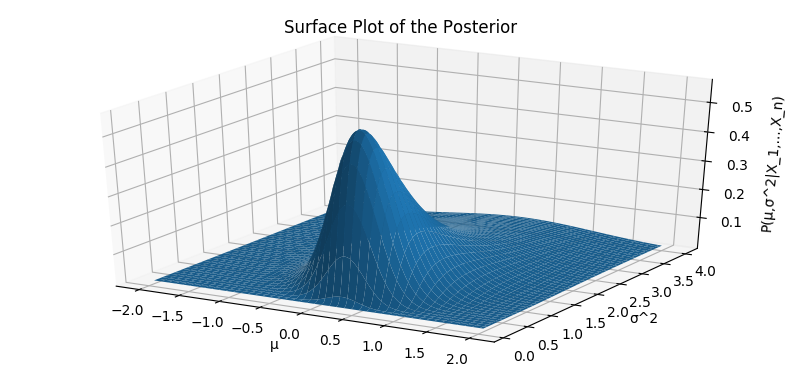

In [170]:
x = range_mu.*ones(length(range_mu),length(range_sig))
y = range_sig'.*ones(length(range_mu),length(range_sig))
fig = figure("pyplot_surfaceplot",figsize=(10,10))
ax = fig[:add_subplot](2,1,1,projection="3d")
ax[:plot_surface](x,y,Post_p)
 xlabel("μ")
ylabel("σ^2")
zlabel("P(μ,σ^2|X_1,...,X_n)")
title("Surface Plot of the Posterior");

#### To get a better overview we also want to plot our results as contour plot and a heatmap.

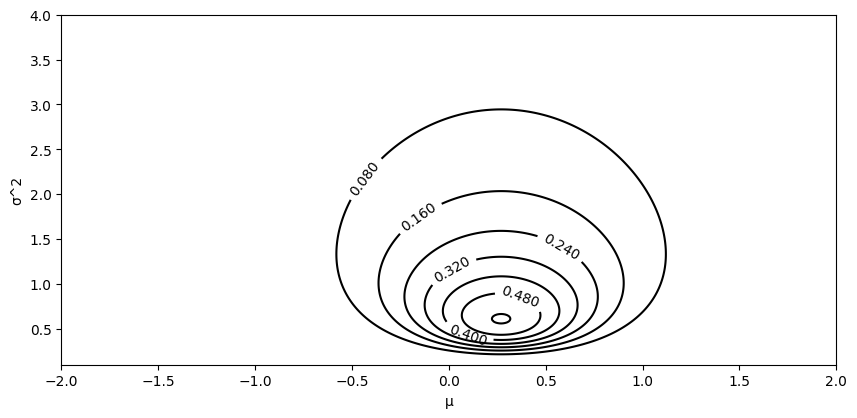

In [171]:
x = range_mu.*ones(length(range_mu),length(range_sig))
y = range_sig'.*ones(length(range_mu),length(range_sig))
fig = figure("pyplot_surfaceplot",figsize=(10,10))
ax = fig[:add_subplot](2,1,1)
cp = ax[:contour](x,y,Post_p, colors="black", linewidth=2.0)
ax[:clabel](cp, inline=1, fontsize=10)
xlabel("μ")
ylabel("σ^2");

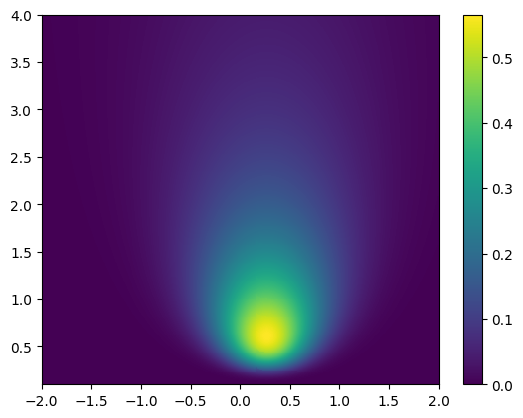

In [172]:
pcolormesh(x,y,Post_p)
colorbar();

#### We now want to calculate the maximum likelihood estimators for $\hat{\mu}$ and $\hat{\sigma}^2$. To do that we implement our function from Q.4.1 and then apply them to our generated data. To confirm that their coordinates coinceide with the peaks of the posterior distribution, we plot the contour plot again and mark the coordinates of the maximum likelihood estimators with a red dot. 

In [173]:
#max. likelihood mean
function l_mean(D)
    m_mean=(1/length(D))sum(D)
end

#max. likelihood variance
function l_var(D)
    V=(D.-l_mean(D)).^2
    m_var=(1/length(D))sum(V)
end
;

In [174]:
B=[likelihood_mean=l_mean(D),likelihood_var=l_var(D)]

2-element Array{Float64,1}:
 0.270166
 0.60958 

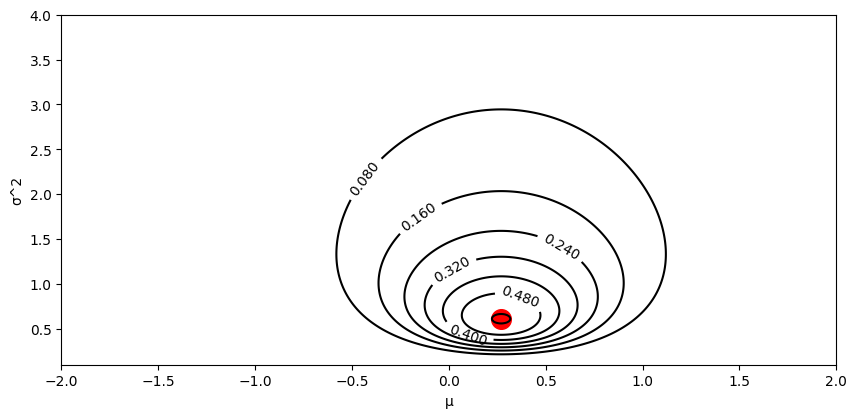

In [175]:
x = range_mu.*ones(length(range_mu),length(range_sig))
y = range_sig'.*ones(length(range_mu),length(range_sig))
fig = figure("pyplot_surfaceplot",figsize=(10,10))
ax = fig[:add_subplot](2,1,1)
cp = ax[:contour](x,y,Post_p, colors="black", linewidth=2.0)
ax[:clabel](cp, inline=1, fontsize=10)
xlabel("μ")
ylabel("σ^2")
scatter(B[1],B[2],s=200,alpha=1,c=[1,0,0]);

#### We now use the posterior distribution to plot the marginals of $\mu$ and $\sigma^2$ and plot these. To check whether their peaks coinceide with $\hat{\mu}$ and $\hat{\sigma}^2$ we mark the maximum of the marginals and also mark $\hat{\mu}$ and $\hat{\sigma}^2$ on the x-axis in the respective plots. We see that $\hat{\mu}$ coinceides quite well with the maximum of the marginal, whereas $\hat{\sigma}^2$ doesn't. This makes sense, considering $\hat{\mu}$ is an unbiased estimator and $\hat{\sigma}^2$ is biased. We also see that the ratio of $\hat{\sigma}^2$ and the x-value of the maximum of the marginal is $4/5= (n-1)/n$ which relates to the bias of  $\hat{\sigma}^2$. This suggests that the maximum likelihood estimator of the marginal distribution is unbiased.

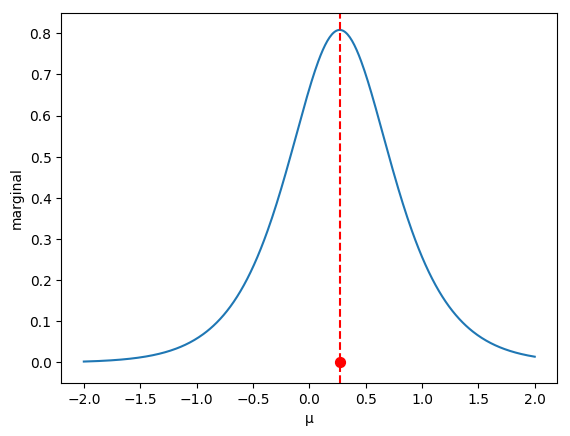

PyObject <matplotlib.text.Text object at 0x7f8e182ff350>

In [176]:
#Marginal Distribution
marg_mu=zeros(length(range_mu))
for i=1:length(range_mu)
    marg_mu[i]=sum(Post_p[i,:])
end
marg_mu=marg_mu.*(dp)
plot(range_mu,marg_mu)
a=findmax(marg_mu)
b=a[2]
c=A[b,1]
d=c[1]
axvline(x=d,c=[1,0,0],linestyle="--")
scatter(B[1],0,s=50,alpha=1,c=[1,0,0])
xlabel("μ")
ylabel("marginal")

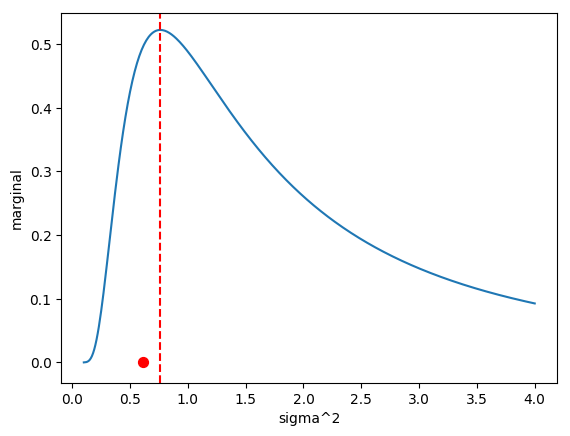

0.8020793077605897
is approximately
0.8
which is the expected bias.


In [177]:
#Marginal Distribution
marg_sig=zeros(length(range_sig))
for i=1:length(range_sig)
    marg_sig[i]=sum(Post_p[:,i])
end
marg_sig=marg_sig.*dp
plot(range_sig,marg_sig)
a=findmax(marg_sig)
b=a[2]
c=A[1,b]
d=c[2]
axvline(x=d,c=[1,0,0],linestyle="--")
scatter(B[2],0,s=50,alpha=1,c=[1,0,0])
xlabel("sigma^2")
ylabel("marginal")

println(B[2]/d) 
println("is approximately") 
println((length(D)-1)/length(D))
println("which is the expected bias.")